# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Auliasari Citra S
- **Email:** citrasyamsuraa@gmail.com
- **ID Dicoding:** 

## Menentukan Pertanyaan Bisnis

- Wilayah mana yang memiliki kualitas udara terburuk dan apa saja faktor-faktor yang mempengaruhi kualitas udara di wilayah tersebut?
- Bagaimana pola kualitas udara di 12 wilayah berubah sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMap
import plotly.express as px

## Data Wrangling

### Gathering Data

In [8]:
aotizhongxin_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [9]:
changping_df =pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [10]:
dingling_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [11]:
dongsi_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [12]:
guanyuan_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

In [13]:
gucheng_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [14]:
huairou_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

In [15]:
nongzhanguan_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [16]:
shunyi_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [17]:
tiantan_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [18]:
wanliu_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

In [19]:
wanshouxigong_df=pd.read_csv("https://raw.githubusercontent.com/auliasarics/Proyek-Analisis-Data/refs/heads/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

**Insight:**
- Terdapat 12 data set, yang masing-masing data menggambarkan kualitas air pada 12 stasiun yang berbeda
- Setiap data set terdiri dari kolom tahun, bulan, hari, PM2.5, PM10, SO2, NO2, CO, O3, temperatur, tekanan, DEWP, curah hujan, wd, WSPM, dan nama stasiun

### Assessing Data

In [22]:
aotizhongxin_df.info()
aotizhongxin_df.isna().sum()
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())
aotizhongxin_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [23]:
changping_df.info()
changping_df.isna().sum()
print("Jumlah duplikasi: ", changping_df.duplicated().sum())
changping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [24]:
dingling_df.info()
dingling_df.isna().sum()
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [25]:
dongsi_df.info()
dongsi_df.isna().sum()
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())
dongsi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [26]:
guanyuan_df.info()
guanyuan_df.isna().sum()
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())
guanyuan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [27]:
gucheng_df.info()
gucheng_df.isna().sum()
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())
gucheng_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

In [28]:
huairou_df.info()
huairou_df.isna().sum()
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())
huairou_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

In [29]:
nongzhanguan_df.info()
nongzhanguan_df.isna().sum()
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())
nongzhanguan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [30]:
shunyi_df.info()
shunyi_df.isna().sum()
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())
shunyi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

In [31]:
tiantan_df.info()
tiantan_df.isna().sum()
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())
tiantan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [32]:
wanliu_df.info()
wanliu_df.isna().sum()
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())
wanliu_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

In [33]:
wanshouxigong_df.info()
wanshouxigong_df.isna().sum()
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())
wanshouxigong_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

**Insight:**
- Terdapat missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, wd, RAIN, WSPM
- Serta terdapat inaccurate value

### Cleaning Data

In [36]:
dataframes = [
    aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df,
    nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df
]

def clean_missing_values(dfs):
    for df in dfs:
        numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])
        for column in numeric_columns:
            if df[column].isna().any():
                df[column] = df[column].fillna(df[column].median())

        if 'wd' in df.columns and df['wd'].isna().any():
            df['wd'] = df['wd'].ffill()

if __name__ == "__main__":
    clean_missing_values(dataframes)

In [37]:
null_counts = {}

for i, df in enumerate(dataframes):
    if not df.empty:
        df_name = f"DataFrame_{i+1}"  
        null_counts[df_name] = df.isna().sum()

if null_counts:
    print(pd.DataFrame(null_counts).transpose())
else:
    print("Tidak ada nilai yang hilang dalam DataFrame yang diproses.")

              No  year  month  day  hour  PM2.5  PM10  SO2  NO2  CO  O3  TEMP  \
DataFrame_1    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_2    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_3    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_4    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_5    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_6    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_7    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_8    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_9    0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_10   0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_11   0     0      0    0     0      0     0    0    0   0   0     0   
DataFrame_12   0     0      

**Insight:**
- nilai yang hilang pada kolom numerik diimputasi menggunakan median untuk menjaga kualitas data dan hasil analisis yang lebih reliabel
- sedangkan kolom kategorikal seperti wd, menggunakan metode forward fill untuk menjaga kontinuitas data dan menghindari pengisian nilai yang tidak sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:
combined_df = pd.concat(dataframes, keys=range(len(dataframes)))
combined_df.reset_index(drop=True, inplace=True)

In [42]:
stations = [
    "Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan", "Gucheng",
    "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wanshouxigong"
]
combined_df['station'] = np.repeat(stations, [len(df) for df in dataframes])

In [43]:
combined_df.to_csv('data_air_quality.csv.gz', index=False, compression='gzip')

In [44]:
print("\nInformasi DataFrame yang Digabungkan:")
print(combined_df.info())
print("\nStatistik Deskriptif DataFrame yang Digabungkan:")
print(combined_df.describe(include='all'))


Informasi DataFrame yang Digabungkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None



## Visualization & Explanatory Analysis

### Pertanyaan 1:Wilayah mana yang memiliki kualitas udara terburuk dan apa saja faktor-faktor yang mempengaruhi kualitas udara di wilayah tersebut?

In [47]:
pm25_avg = combined_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

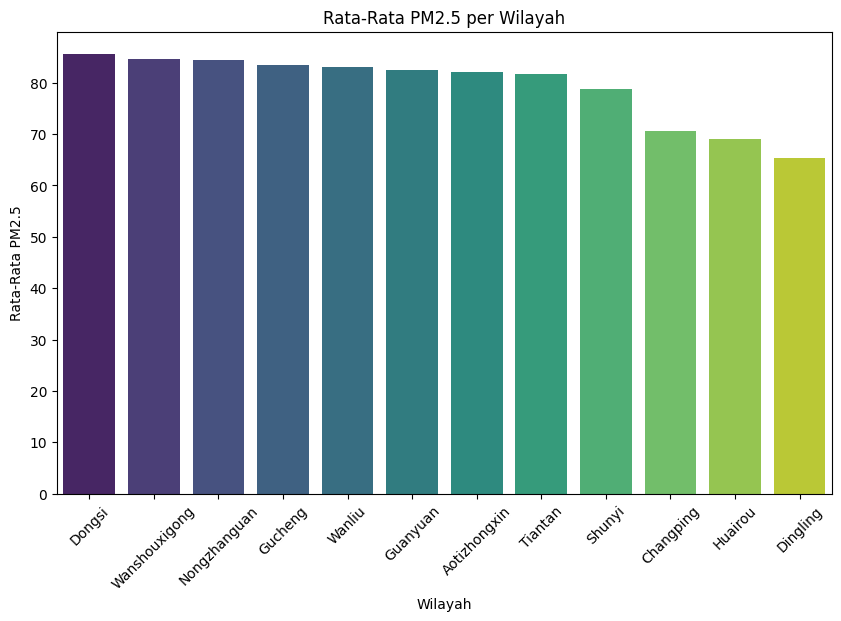

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pm25_avg.index, y=pm25_avg.values, hue=pm25_avg.index, palette="viridis", legend=False)
plt.title('Rata-Rata PM2.5 per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Rata-Rata PM2.5')
plt.xticks(rotation=45)
plt.show()

In [49]:
correlation_matrix = combined_df[['PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3', 'TEMP']].corr()

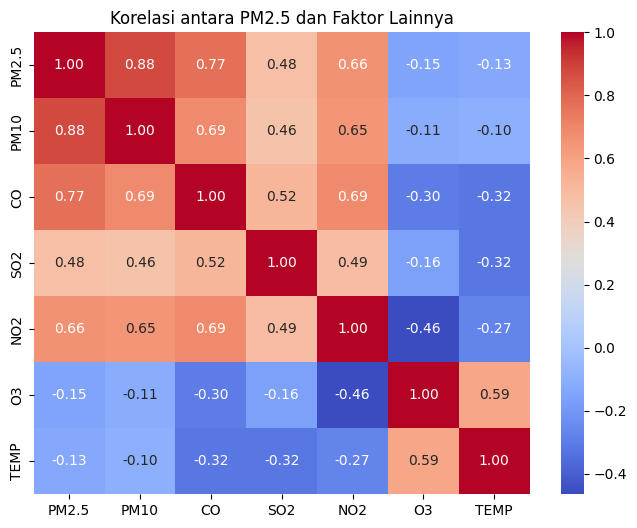

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelasi antara PM2.5 dan Faktor Lainnya')
plt.show()

### Pertanyaan 2:Bagaimana pola kualitas udara di 12 wilayah berubah sepanjang tahun?

In [52]:
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
combined_df.set_index('datetime', inplace=True)

In [53]:
monthly_pm25 = combined_df.groupby('station')['PM2.5'].resample('ME').mean().unstack(level=0)

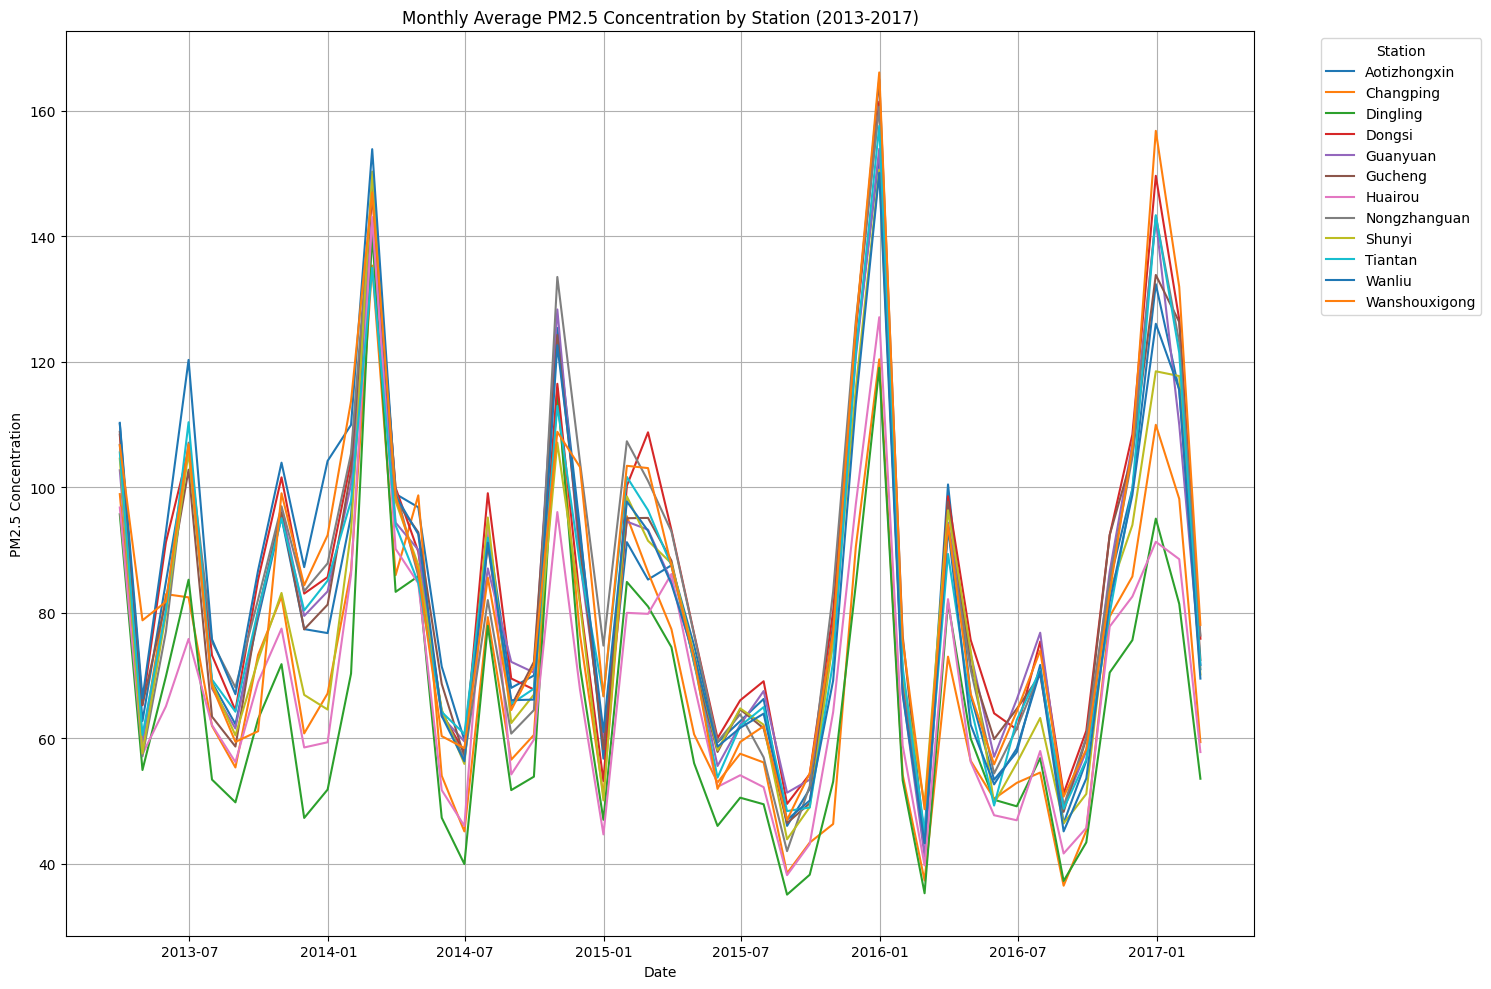

In [54]:
plt.figure(figsize=(15, 10))
for station in monthly_pm25.columns:
    plt.plot(monthly_pm25.index, monthly_pm25[station], label=station)

plt.title('Monthly Average PM2.5 Concentration by Station (2013-2017)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Wilayah yang memiliki kualitas udara terburuk yaitu Dongsi, Wanshouxigong dan Nongzhanguan.
Faktor yang mempengaruhi buruknya kualitas udara adalah PM10, PM2.5, SO2, NO2 dan CO. Semakin meningkat kadar PM2.5, maka semakin meningkat pula kadar polutan yang lain. Namun polutan yang telah disebutkan tadi berbanding terbalik dengan temperatur dan O3. Jika temperatur atau O3 tinggi maka kadar polutan akan rendah.
- Terjadi peningkatan kadar PM2.5 setiap musim dingin di setiap tahun, sedangkan pada musim panas cenderung menurun.

## Analisis Lanjutan (Opsional)

In [57]:
station_coords = {
    "Aotizhongxin": [39.9042, 116.4074],
    "Changping": [40.2181, 116.2317],
    "Dingling": [40.2928, 116.2167],
    "Dongsi": [39.9289, 116.4167],
    "Guanyuan": [39.9333, 116.3667],
    "Gucheng": [39.9167, 116.1833],
    "Huairou": [40.3167, 116.6333],
    "Nongzhanguan": [39.9333, 116.4667],
    "Shunyi": [40.1333, 116.6667],
    "Tiantan": [39.8833, 116.4167],
    "Wanliu": [39.9833, 116.2833],
    "Wanshouxigong": [39.8833, 116.3667]
}

pm25_avg = combined_df.groupby('station')['PM2.5'].mean().reset_index()

pm25_avg['latitude'] = pm25_avg['station'].map({k: v[0] for k, v in station_coords.items()})
pm25_avg['longitude'] = pm25_avg['station'].map({k: v[1] for k, v in station_coords.items()})

m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

for idx, row in pm25_avg.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['station']}: Avg PM2.5 = {row['PM2.5']:.2f}",
        tooltip=row['station']
    ).add_to(m)

heat_data = [[row['latitude'], row['longitude'], row['PM2.5']] for idx, row in pm25_avg.iterrows()]
HeatMap(heat_data).add_to(m)

m.save('air_quality_map.html')

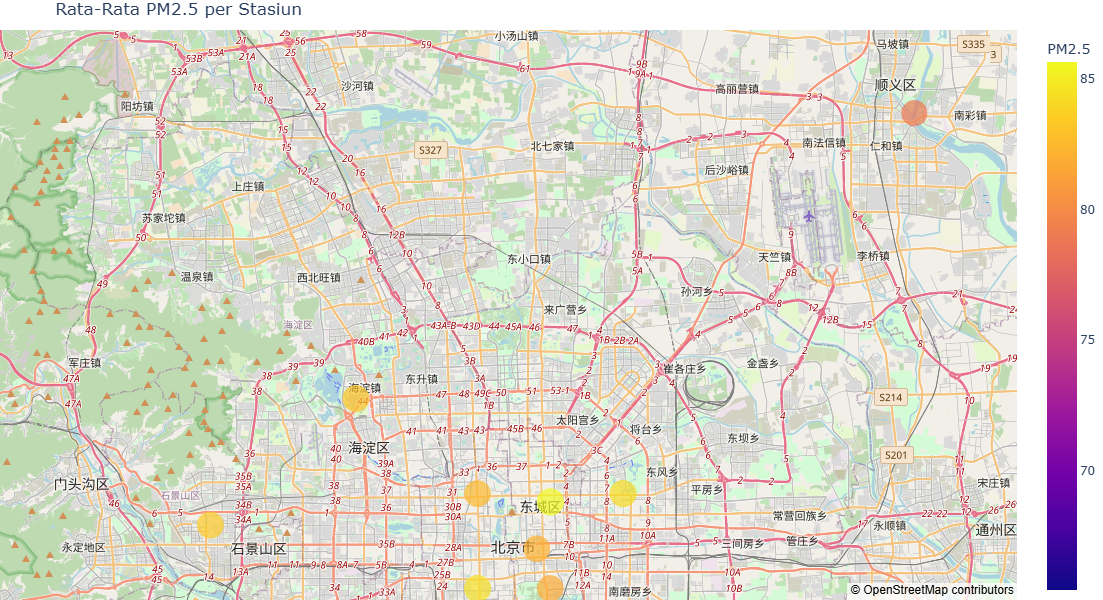

In [58]:
fig = px.scatter_mapbox(
    pm25_avg,
    lat='latitude',
    lon='longitude',
    hover_name='station',
    hover_data=['PM2.5'],
    size='PM2.5',
    color='PM2.5',
    zoom=10,
    height=600,
    title='Rata-Rata PM2.5 per Stasiun'
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

fig.show()

## Conclusion

- Wilayah dengan Kualitas Udara Terburuk: Dongsi, Wanshouxigong, dan Nongzhanguan.
- Faktor yang Mempengaruhi: PM10, PM2.5, SO2, NO2, dan CO.
- Pola Musiman: Kadar PM2.5 meningkat pada musim dingin dan menurun pada musim panas.
- 
Analisis ini dapat digunakan untuk mengambil keputusan terkait pengendalian polusi udara di Beijing.